In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')

In [5]:
df[df['id'] == 9][['long','lat']].to_json(orient="values")

'[[55.9406347354,54.72521623],[55.9406361417,54.7252206472],[55.9406392531,54.7252240817],[55.9406389645,54.7252297878],[55.9406402008,54.7252328487],[55.9406424301,54.7252368566],[55.9406445944,54.7252404166],[55.9406450666,54.7252448955],[55.9406471597,54.7252479875],[55.9406493995,54.7252526532],[55.9406496455,54.7252550462],[55.9406536488,54.7252602614],[55.9406557043,54.7252636202],[55.9406577793,54.7252673368],[55.9406590523,54.7252716877],[55.9406612023,54.7252764775],[55.9406614934,54.7252795203],[55.9406635419,54.7252834765],[55.9406638962,54.72528723],[55.9406675442,54.7252909011],[55.9406695668,54.7252951119],[55.9406724164,54.7252997114],[55.9406734857,54.7253026805],[55.940675448,54.7253067688],[55.9406766828,54.7253118281],[55.9406819155,54.7253177835],[55.9406838805,54.7253227553],[55.9406833837,54.7253261761],[55.9406867853,54.7253301052],[55.940686451,54.7253355229],[55.9406906068,54.7253400444],[55.9406906068,54.7253400444],[55.9406909923,54.7253450533],[55.9406927726

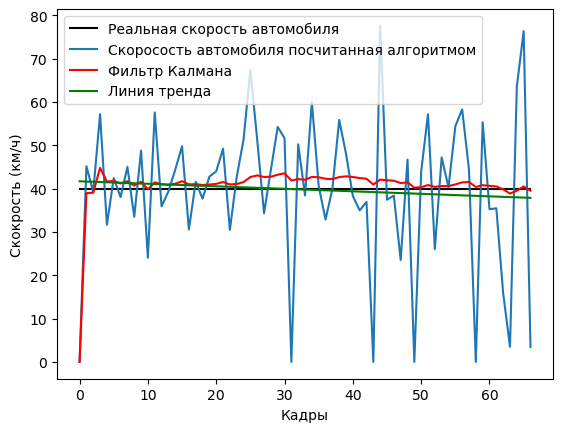

Real speed:  40
Raw mean:  39.80367301767654
Raw std:  17.332371036770944
Kalman mean:  40.781961521277275
Kalman std:  5.141908564822907


In [8]:
speed = np.array(df[df['id'] == 9]['speed'])
x = np.arange(len(speed))
trend = np.poly1d(np.polyfit(x, speed, 1))

# intial parameters---------------
n = len(speed)
sz = (n) # size of array
Q = 1e-4 # process variance
# allocate space for arrays
xhat = np.zeros(sz)      # a posteri estimate of x
P = np.zeros(sz)         # a posteri error estimate
xhatminus = np.zeros(sz) # a priori estimate of x
Pminus = np.zeros(sz)    # a priori error estimate
K = np.zeros(sz)         # Kalman gain
R = 0.4**2 # estimate of measurement variance
xhat[0] = 0.0
P[0] = 1.0

for i in range(1, n):

    xhatminus[i] = xhat[i-1]
    Pminus[i] = P[i-1] + Q

    K[i] = Pminus[i] / ( Pminus[i] + R )
    xhat[i] = xhatminus[i] + K[i] * (speed[i] - xhatminus[i])
    P[i] = (1 - K[i]) * Pminus[i]
#-------------------------------

plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.plot(x, xhat, color='red')
plt.plot(x, trend(x), color='green')

plt.xlabel("Кадры")
plt.ylabel("Скокрость (км/ч)")
plt.legend(["Реальная скорость автомобиля", "Скоросость автомобиля посчитанная алгоритмом", "Фильтр Калмана","Линия тренда"])
# plt.xlabel("Frames")
# plt.ylabel("Speed (km/h)")
# plt.legend(["Real speed", "Predicted speed", "Klaman filter","Trend line"])
plt.show()

print("Real speed: ", 40)
print("Raw mean: ", np.mean(speed))
print("Raw std: ", np.std(speed))
print("Kalman mean: ", np.mean(xhat))
print("Kalman std: ", np.std(xhat))